In [1]:
# Import pyNBS modules
from pyNBS import data_import_tools as dit
from pyNBS import network_propagation as prop
from pyNBS import pyNBS_core as core
from pyNBS import pyNBS_single
from pyNBS import consensus_clustering as cc
from pyNBS import pyNBS_plotting as plot

# Import other needed packages
import os
import time
import pandas as pd
import numpy as np
from IPython.display import Image

In [2]:
maf_path = './GBMmaf.txt'
sm_path = './GBM_sm_data.txt'
dit.process_TCGA_MAF(maf_path, './GBM_sm_data.txt', verbose = True)

Binary somatic mutation matrix saved
MAF file processed: ./GBMmaf.txt 6.5 seconds.


In [3]:
sm_mat = pd.read_csv(sm_path, index_col = 0).astype(int)
sm_mat

,A1BG,A1CF,A2M,A2ML1,A4GALT,A4GNT,AAAS,AACS,AACSP1,AADAC,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3,hsa-mir-1253,pk
TCGA-32-4208,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-12-0657,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
TCGA-26-5139,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-06-0875,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-12-0619,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-76-6283,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-08-0386,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-27-1832,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-12-0818,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
network_filepath = './Example_Data/Network_Files/HumanNet90_Symbol.txt'
network = dit.load_network_file(network_filepath)
len(network.nodes)

Network File Loaded: ./Example_Data/Network_Files/HumanNet90_Symbol.txt


7939

In [5]:
# knnGlap = core.network_inf_KNN_glap(network)
# knnGlap.to_csv('./knnGlap_HN90.csv')
knnGlap = pd.read_csv('./knnGlap_HN90.csv', index_col = 0)
knnGlap

,GTF2E1,GTF2A1,TAF4,TAF13,GTF2A2,GTF2E2,GTF2H4,GTF2H3,TAF12,TAF6,...,LRRFIP1,LRRFIP2,DPP7,ENPEP,SYT14,SYT16,FER,LTK,NKD1,NKD2
GTF2E1,12,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0
GTF2A1,-1,11,-1,0,-1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TAF4,-1,-1,14,-1,-1,0,0,0,-1,0,...,0,0,0,0,0,0,0,0,0,0
TAF13,-1,0,-1,13,-1,-1,0,0,-1,-1,...,0,0,0,0,0,0,0,0,0,0
GTF2A2,-1,-1,-1,-1,14,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SYT16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,-1,1,0,0,0,0
FER,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,-1,0,0
LTK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-1,1,0,0
NKD1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,-1


In [6]:
alpha = 0.7
clusters = 3
niter = 30

# Optional: Setting the output directory for files to be saved in
outdir = './Results/HN90_GBM/'+'c'+str(clusters)+'_i'+str(niter)+'/'

# Optional: Creating above output directory if it doesn't already exist
if not os.path.exists(outdir):
    os.makedirs(outdir)
    
# Optional: Setting a filename prefix for all files saved to outdir
job_name = 'HN90_c'+str(clusters)+'_i'+str(niter)

# Constructs dictionary to be passed as "save_args" to functions if output to be saved
save_args = {'outdir': outdir, 'job_name': job_name}

In [7]:
network_nodes = network.nodes()
network_I = pd.DataFrame(np.identity(len(network_nodes)), index=network_nodes, columns=network_nodes)

# kernel = prop.network_propagation(network, network_I, alpha=alpha, symmetric_norm=False)
# kernel.to_csv('./kernel_HN90.csv')
kernel = pd.read_csv('./kernel_HN90.csv', index_col = 0)
kernel

,GTF2E1,TAF9,TAF6,TAF4,TAF5,CFL2,HCLS1,CPSF3,WDR33,ATP7A,...,LRRFIP2,LRRFIP1,DPP7,ENPEP,SYT14,SYT16,FER,LTK,NKD1,NKD2
GTF2E1,0.306637,0.014976,0.013777,0.014002,0.014251,0.000010,0.000022,0.000784,0.000105,5.823783e-07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
TAF9,0.007845,0.311847,0.011590,0.009116,0.011366,0.000011,0.000023,0.000483,0.000093,8.440327e-07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
TAF6,0.009185,0.014751,0.311842,0.011710,0.015876,0.000014,0.000036,0.000427,0.000095,9.026563e-07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
TAF4,0.016213,0.020151,0.020338,0.309458,0.020660,0.000011,0.000023,0.000495,0.000124,5.487274e-07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
TAF5,0.006270,0.009547,0.010478,0.007851,0.307778,0.000027,0.000029,0.000318,0.000060,1.239453e-06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ADAMDEC1,0.000016,0.000040,0.000041,0.000014,0.000079,0.000006,0.000018,0.000024,0.000013,5.545053e-07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
ETHE1,0.000016,0.000039,0.000026,0.000013,0.000032,0.000021,0.000025,0.000020,0.000009,2.042856e-06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
NKD1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.588235,0.411765
NKD2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.411765,0.588235


In [8]:
Hlist = []
for i in range(niter):
    netNMF_time = time.time()
    # Run pyNBS core steps and save resulting H matrix to Hlist
    Hlist.append(pyNBS_single.NBS_single(sm_mat, knnGlap, propNet=network, propNet_kernel=kernel, k=clusters))
    
    ##########################################################################################################
    # Optional: If the user is saving intermediate outputs (propagation results or H matrices), 
    # a different 'iteration_label' should be used for each call of pyNBS_single().
    # Otherwise, the user will overwrite each H matrix at each call of pyNBS_single()
    # Uncomment and run the two lines below to save intermediate steps instead of the previous line
    # save_args['iteration_label']=str(i+1)
    # Hlist.append(pyNBS_single.NBS_single(sm_mat, propNet=network, propNet_kernel=kernel, regNet_glap=knnGlap, 
    #                                      k=clusters, **save_args))
    ##########################################################################################################
    
    # Report run time of each pyNBS iteration
    t = time.time()-netNMF_time
    print ('NBS iteration:', i+1, 'complete:', t, 'seconds')

/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 1 complete: 85.02214193344116 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 2 complete: 86.63464188575745 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 3 complete: 87.4386956691742 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 4 complete: 85.19109010696411 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 5 complete: 86.57825136184692 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 6 complete: 86.23120069503784 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 7 complete: 83.25579738616943 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 8 complete: 80.79731845855713 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 9 complete: 80.94580173492432 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 10 complete: 82.65131402015686 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 11 complete: 81.33211541175842 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 12 complete: 81.34226989746094 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 13 complete: 81.86861181259155 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 14 complete: 81.3558247089386 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 15 complete: 81.85035538673401 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 16 complete: 81.6013560295105 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 17 complete: 80.17744255065918 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 18 complete: 79.98232221603394 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 19 complete: 80.57448601722717 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 20 complete: 81.02392220497131 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 21 complete: 80.42015051841736 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 22 complete: 80.32966685295105 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 23 complete: 80.5918447971344 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 24 complete: 80.28938555717468 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 25 complete: 80.15854001045227 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 26 complete: 80.26644492149353 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 27 complete: 82.63137412071228 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 28 complete: 83.60197973251343 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 29 complete: 82.42976903915405 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 30 complete: 81.80118799209595 seconds


In [9]:
NBS_cc_table, NBS_cc_linkage, NBS_cluster_assign = cc.consensus_hclust_hard(Hlist, k=clusters, **save_args)

Constructing Hlist: 30 cluster matrices,  389 samples
Hlist consensus constructed and sample clusters assigned


In [10]:
# Assign colors to clusters from pyNBS
pyNBS_GBM_clust_cmap = plot.cluster_color_assign(NBS_cluster_assign, name='GBM Cluster Assignments')

# Plot and save co-cluster map figure
plot.plot_cc_map(NBS_cc_table, NBS_cc_linkage, col_color_map=pyNBS_GBM_clust_cmap, **save_args)

Co-Clustering Map plotted


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_plotting.py:51: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


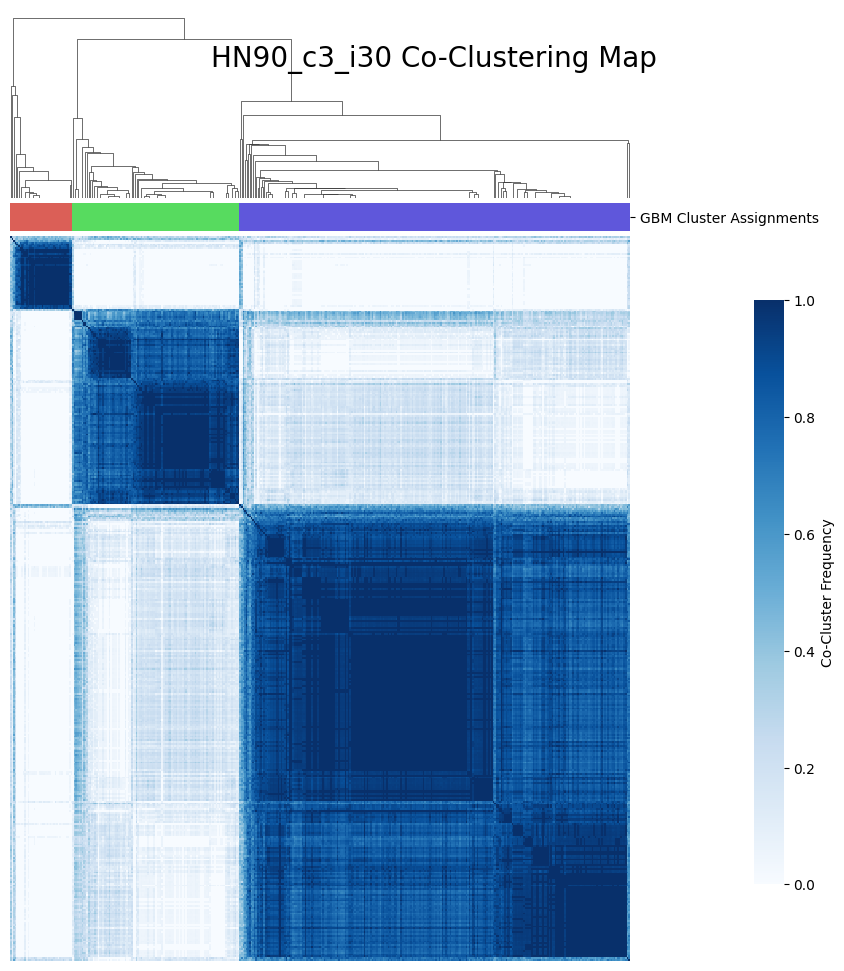

In [11]:
Image(filename = save_args['outdir']+save_args['job_name']+'_cc_map.png', width=600, height=600)

In [12]:
gbm_clinical_path = './gbm_clinical.csv'
gbm_clinical = pd.read_csv(gbm_clinical_path, index_col = 0)
gbm_clinical = gbm_clinical[['submitter_id','vital_status','days_to_death','days_to_last_follow_up']]
gbm_clinical = gbm_clinical.replace({'Dead':0, 'Alive' : 1, 'Not Reported': 0}).fillna(0)
gbm_clinical['overall_survival'] = [ max(i,j) for i,j in 
                                    zip(gbm_clinical['days_to_death'],gbm_clinical['days_to_last_follow_up'])]
gbm_clinical.to_csv('./survival_GBM.csv', index = False)

Multi-Class Log-Rank P: 0.26905424143001805
Kaplan Meier Plot constructed


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_plotting.py:107: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


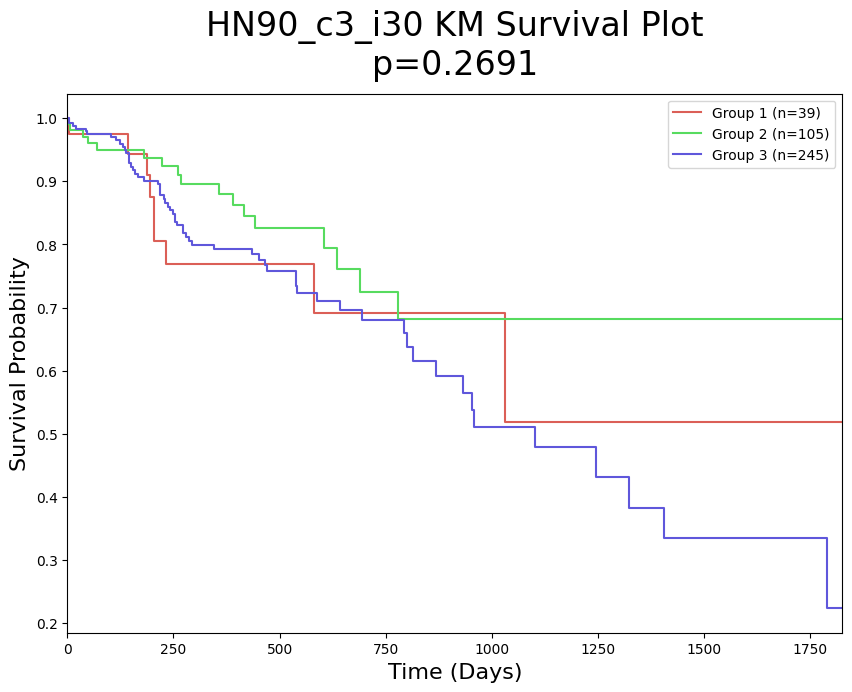

In [13]:
# Load survival Data
surv_data = './survival_GBM.csv'

# Plot KM Plot for patient clusters
plot.cluster_KMplot(NBS_cluster_assign, surv_data, delimiter=',', **save_args)
Image(filename = save_args['outdir']+save_args['job_name']+'_KM_plot.png', width=600, height=600)